## Analysis of the Magnetization mapping $\sigma^{z} \rightarrow \sigma^{x} $

#### Imports

In [62]:
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from tqdm.notebook import tqdm, trange


## Part (a) Study the scaling property at different $h_{max} $

#### Data

In [31]:
h_max=1.0 #field
ls=[16,32,64,128] #sizes
ns=[100,100,100,100] #samples


xs_ml={} # sigma_x ml
xs={} # sigma_x exact
zs={} # sigma_z exact
for i in range(len(ls)):
    print(i)

    # load the data
    data=np.load(f'data/den2magn_dataset_1nn/test_unet_periodic_1nn_l_{ls[i]}_h_{h_max}_ndata_{ns[i]}.npz')
    # target  
    x=torch.tensor(data['magnetization_x'],dtype=torch.double)
    # input
    z=torch.tensor(data['density'],dtype=torch.double)
    # load the model and compute xs_ml
    model=torch.load(f'model_rep/1nn_den2magn/h_{h_max}_15k_unet_periodic_den2magn_[20, 40]_hc_5_ks_2_ps_2_nconv_0_nblock',map_location='cpu')
    x_ml=model(z).detach().numpy()
    xs_ml[ls[i]]=np.abs(x_ml)
    xs[ls[i]]=np.abs(x.detach().numpy()) 
    zs[ls[i]]=z.detach().numpy()


0
1
2
3


#### Accuracy vs Size

We predict the magnetization up to a sign. We found inconsistency in the sign of $\sigma^x$ in the target dataset (DMRG problems? perturbation too low?)

#### $ |\Delta x|$ vs $l$

According to the $L_2$ metric we compute the error:

$\langle \langle|\Delta x| \rangle \rangle =\frac{1}{N_{batch}}\sum^{N_{batch}}_i ||\vec{x_i}|-|\vec{x_{ml,i}}||/|\vec{x_i}|$

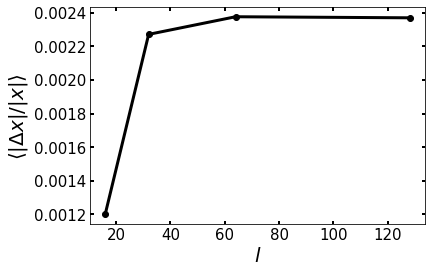

In [32]:
dxs=[]
#compute the error for each size
for l in ls:
    dx= np.average( np.sqrt( np.average((xs[l]-xs_ml[l])**2,axis=-1))/np.sqrt(np.average((xs[l])**2,axis=-1))  )
    dxs.append(dx)
    
#plot the behaviour
#plt.figure(figsize=(10,10))
plt.plot(ls,dxs,color='black',marker='o',linewidth=3)
plt.xlabel(r'$l$',fontsize=20)
plt.ylabel(r'$\langle |\Delta x|/|x| \rangle$',fontsize=20)
plt.tick_params(
            top=True,
            right=True,
            labeltop=False,
            labelright=False,
            direction="in",
            labelsize=15,
            width=2,
        )
plt.show()

## Part (b) Study the Accuracy vs. Disorder

#### Data

In [35]:
h_max=[1.0,1.8,2.71,3.6,4.5] #field
ls=[128,128,128,128,128] #sizes
ns=[100,100,100,100,100] #samples


xs_ml={} # sigma_x ml
xs={} # sigma_x exact
zs={} # sigma_z exact
for i in range(len(ls)):
    print(i)
    # load the data
    data=np.load(f'data/den2magn_dataset_1nn/test_unet_periodic_1nn_l_{ls[i]}_h_{h_max[i]}_ndata_{ns[i]}.npz')
    # target  
    x=torch.tensor(data['magnetization_x'],dtype=torch.double)
    # input
    z=torch.tensor(data['density'],dtype=torch.double)
    # load the model and compute xs_ml
    model=torch.load(f'model_rep/1nn_den2magn/h_{h_max[i]}_15k_unet_periodic_den2magn_[20, 40]_hc_5_ks_2_ps_2_nconv_0_nblock',map_location='cpu')
    x_ml=model(z).detach().numpy()
    xs_ml[h_max[i]]=np.abs(x_ml)
    xs[h_max[i]]=np.abs(x.detach().numpy()) 
    zs[h_max[i]]=z.detach().numpy()
    
    

0
1
2
3
4


#### Accuracy vs. Disorder

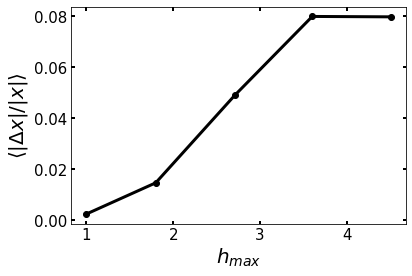

In [36]:
dxs=[]
#compute the error for each size
for h in h_max:
    dx= np.average( np.sqrt( np.average((xs[h]-xs_ml[h])**2,axis=-1))/np.sqrt(np.average((xs[h])**2,axis=-1))  )
    dxs.append(dx)
    
#plot the behaviour
#plt.figure(figsize=(10,10))
plt.plot(h_max,dxs,color='black',marker='o',linewidth=3)
plt.xlabel(r'$h_{max}$',fontsize=20)
plt.ylabel(r'$\langle |\Delta x|/|x| \rangle$',fontsize=20)
plt.tick_params(
            top=True,
            right=True,
            labeltop=False,
            labelright=False,
            direction="in",
            labelsize=15,
            width=2,
        )
plt.show()

## Case c) Phase diagram for different sizes

We study the Phase Diagram considering the order Parameter $M_N=\mathbb{E}[\frac{1}{N} \sum_i |\langle x_i \rangle|]_{disorder} $ with both the synthetic and exact magnetization

#### Data

In [63]:
h_max=[1.0,1.8,2.71,3.6,4.5] #field
ls=[16,32,64,128] #sizes
n=100 #samples


m_n=[]
m_n_ml=[]
for i in range(len(ls)):
    xs_ml=[]
    xs=[]
    for j in range(len(h_max)):
        # load the data
        data=np.load(f'data/den2magn_dataset_1nn/test_unet_periodic_1nn_l_{ls[i]}_h_{h_max[j]}_ndata_{n}.npz')
        # target  
        x=torch.tensor(data['magnetization_x'],dtype=torch.double)
        # input
        z=torch.tensor(data['density'],dtype=torch.double)
        # load the model and compute xs_ml
        model=torch.load(f'model_rep/1nn_den2magn/h_{h_max[j]:.1f}_15k_unet_periodic_den2magn_[20, 40]_hc_5_ks_2_ps_2_nconv_0_nblock',map_location='cpu')
        x_ml=model(z).detach().numpy()
        xs_ml.append(np.average(np.abs(x_ml)))
        xs.append(np.average(np.abs(x.detach().numpy()))) 
        
    xs=np.asarray(xs)
    xs_ml=np.asarray(xs_ml)
    m_n.append(xs)
    m_n_ml.append(xs_ml)

m_n=np.asarray(m_n)
m_n_ml=np.asarray(m_n_ml)
print(m_n_ml.shape)

(4, 5)


#### Phase diagram for different sizes

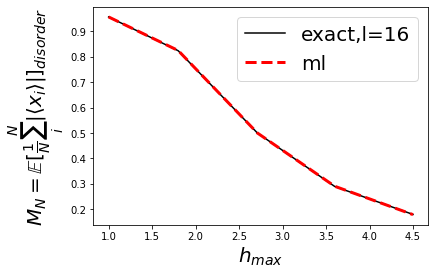

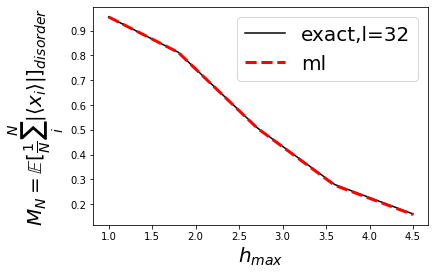

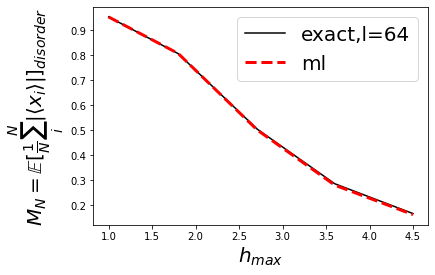

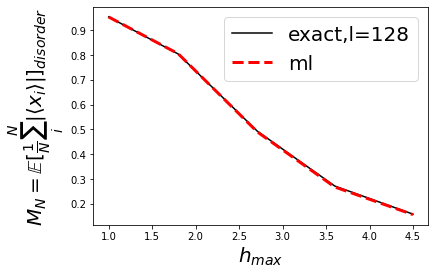

In [67]:
#h_max=np.asarray(h_max)
for i in range(m_n.shape[0]):
    plt.plot(h_max,m_n[i],label=f'exact,l={ls[i]}',color='black')
    plt.plot(h_max,m_n_ml[i],label=f'ml',color='red',linewidth=3,linestyle='--')
    plt.legend(fontsize=20)
    plt.xlabel(r'$h_{max}$',fontsize=20)
    plt.ylabel(r'$M_N=\mathbb{E}[\frac{1}{N} \sum^{N}_i |\langle x_i \rangle|]_{disorder}$',fontsize=20)
    plt.show()

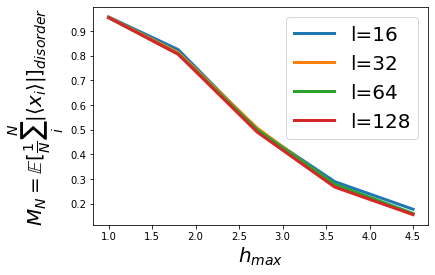

In [73]:
for i in range(m_n.shape[0]):
    #plt.plot(h_max,m_n[i]),label=f'exact,l={ls[i]}',color='black')
    plt.plot(h_max,m_n_ml[i],label=f'l={ls[i]}',linewidth=3)
    plt.legend(fontsize=20)
#plt.loglog()
plt.xlabel(r'$h_{max}$',fontsize=20)
plt.ylabel(r'$M_N=\mathbb{E}[\frac{1}{N} \sum^{N}_i |\langle x_i \rangle|]_{disorder}$',fontsize=20)
plt.show()